<a href="https://colab.research.google.com/github/nimishac28/DataAnalytics/blob/main/Hr%20Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data= pd.read_csv("HR_comma_sep.csv")
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


DATA ATTRIBUTES¶

satisfaction_level: Employee satisfaction level

last_evaluation: Last evaluation

number_project: Number of projects

average_montly_hours: Average monthly hours

time_spend_company: Time spent at the company

Work_accident: Whether they have had a work accident

promotion_last_5years: Whether they have had a promotion in the last 5 years

department: Department

salary: Salary

left: Whether the employee has left

Since there are are only 10 variables, dont want to miss out on any varibales, ignoring the part of using pandas profile report to judge which variables to drop. Also within the profile report checked there are no varibales with missing values

In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


Basically, work_accident , left and promotion_last_5years are categorical in nature with 0's as min and 1's max

In [4]:
data['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

0 means people are there, on which we have to do predictive analysis and 1 means people have left, we can use 1's data to understand the nature of employees

In [5]:
data[data.left==1].groupby(['salary'])[['number_project','average_montly_hours','time_spend_company','Work_accident','left','promotion_last_5years']].sum()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
salary,,,,,,
high,283,15834,302,0,82,0
low,8332,448803,8416,95,2172,14
medium,5153,276057,5125,74,1317,5


As data says, people with low and medium saalry mostly left, even they got promotion, they had large no. of projects, their monthly working hours is also more, time_spend is in the company is also more,they have had more of work_acidents. We need to focus more on low and medium salried employees. Also people with high salary have left when there were no promotions in the last 5 years

In [6]:
data[data.left==0].groupby(['salary'])[['number_project','average_montly_hours','time_spend_company','Work_accident','left','promotion_last_5years']].sum()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
salary,,,,,,
high,4377,231402,4266,192,0,72
low,19468,1021688,16738,945,0,52
medium,19429,1021770,17623,863,0,176


In [7]:
# how does satisfaction level and last_evealuation impact the employee stay or leaving the company

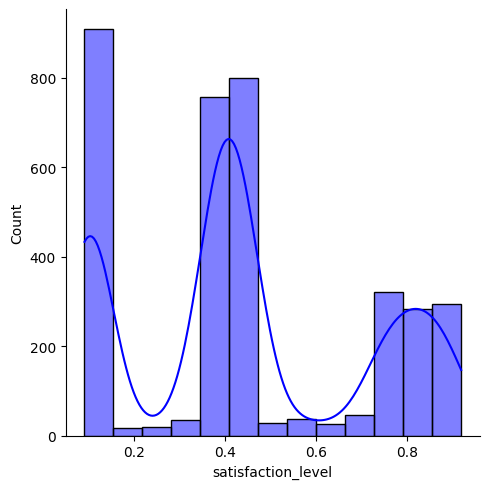

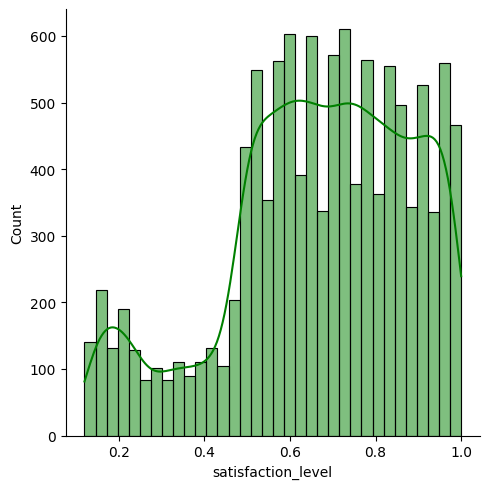

In [8]:
sns.displot(data[data.left==1]['satisfaction_level'],color='b',kde=True)
sns.displot(data[data.left==0]['satisfaction_level'],color='g',kde=True)

As the data says, more people left, who had satisfaction_level <=0.5, as the satisfaction_level increased , the count of people leaving decreased but still people are leaving in less no. and the people with satisfaction_level > 0.7 have also left

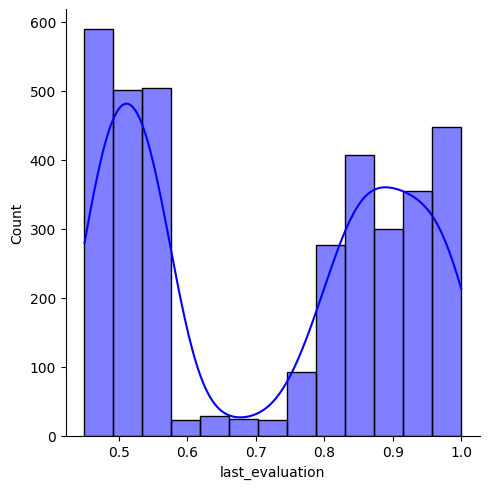

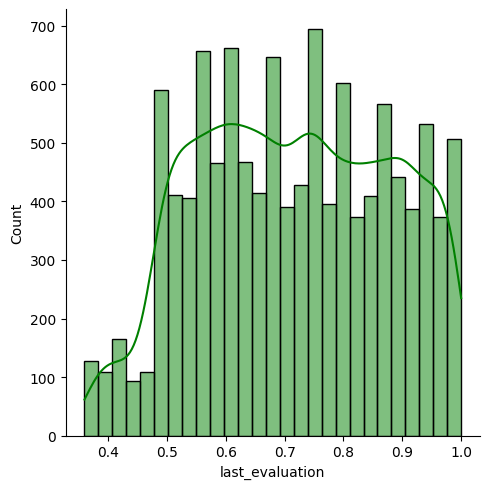

In [9]:
sns.displot(data[data.left==1]['last_evaluation'],color='b',kde=True)
sns.displot(data[data.left==0]['last_evaluation'],color='g',kde=True)

As the data says, people with evealuation <0.6 have mostly left and also the people who have last_evalutation >0.8 have left.

In [10]:
# Understanding the nature of time spend in the company by the employees

In [11]:
time_spend_count= data[['left','time_spend_company']].groupby(['left','time_spend_company'],group_keys=False).size()
time_spend_percent=time_spend_count.groupby(level=[0],group_keys=False).apply(lambda x: x/x.sum()).reset_index()
time_spend_percent.columns=['left','years','percentage']
time_spend_percent

,left,years,percentage
0,0,2,0.279226
1,0,3,0.425009
2,0,4,0.145870
3,0,5,0.056003
4,0,6,0.044540
5,0,7,0.016451
6,0,8,0.014176
7,0,10,0.018726
8,1,2,0.014842
9,1,3,0.444133


<Axes: xlabel='years', ylabel='percentage'>

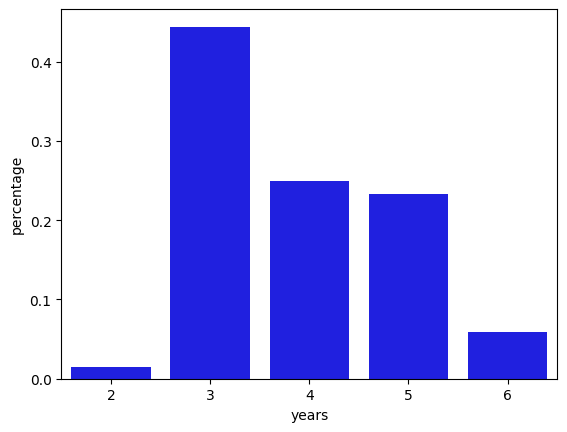

In [12]:
sns.barplot(data=time_spend_percent[time_spend_percent.left==1], x='years',y='percentage', color='b')

As the data sasy, people who have left have been in the company for 3, 4 & 5 years mostly. Beyond 6 years, people are not leaving. And people who have spend 2 years in the company are less in terms of leaving the company.

<Axes: xlabel='years', ylabel='percentage'>

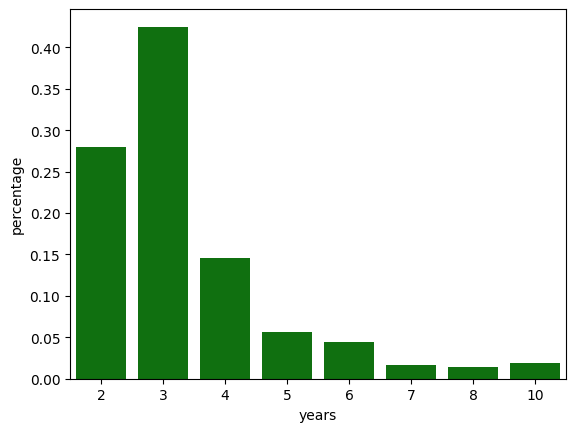

In [13]:
sns.barplot(data=time_spend_percent[time_spend_percent.left==0], x='years',y='percentage', color='g')

In [14]:
# Department, in which most of the employees are leaving

In [15]:
department_count=data[['department','left']].groupby(['department','left'],group_keys=False).size()
department_count=department_count.groupby(level=[0],group_keys=False).apply(lambda x: x/x.sum()).reset_index()
department_count.columns=['department','left','percent']

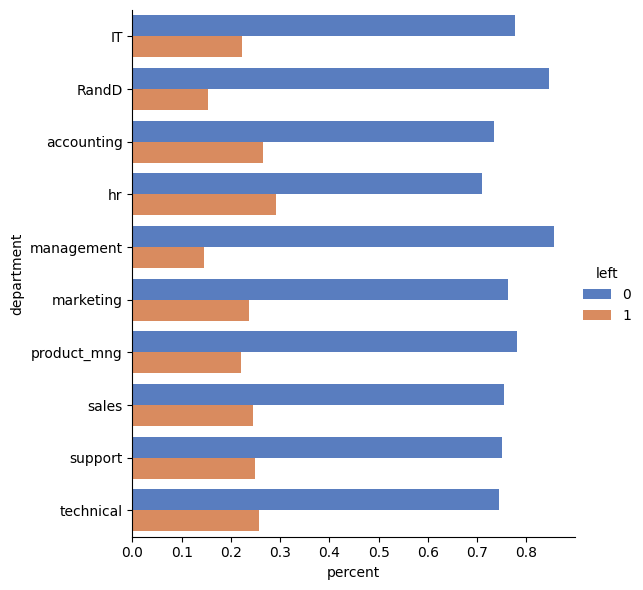

In [16]:
sns.catplot(y="department",
            x = 'percent',
            hue="left",
            data = department_count,
            height=6,
            kind="bar",
            palette="muted")

HR department have most of the people leaving, managemnt has low percentage of people leaving the company

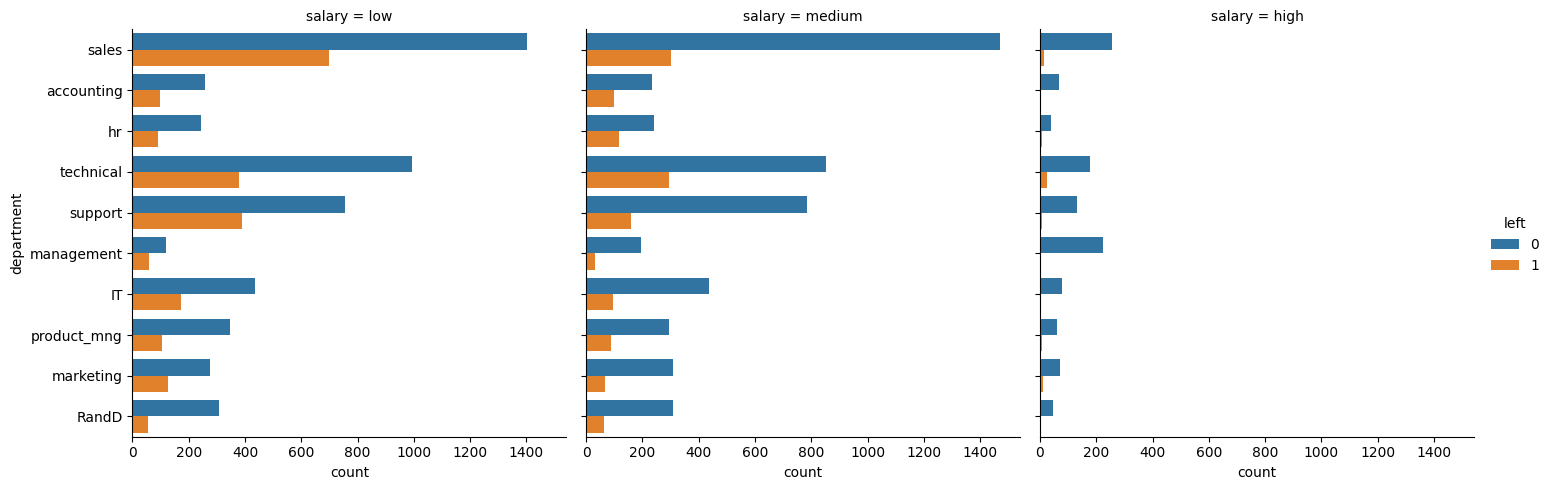

In [17]:
sns.catplot( y = "department",
            col="salary",
            hue = "left",
            data=data,
            kind="count",
            height=5)

People with low and medium salary , who are in sales, technical, and support are leaving

<ipython-input-18-fb77e9d5e9ed>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat=data.corr()


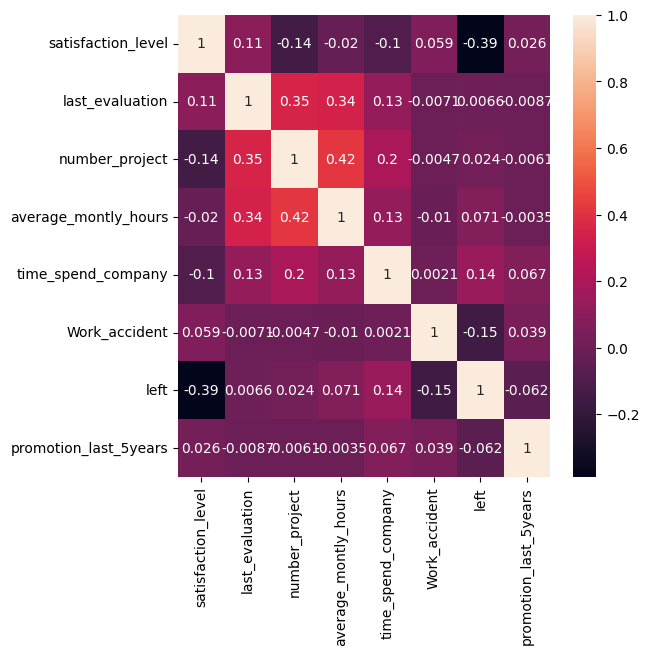

In [18]:
corrmat=data.corr()
f, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(corrmat, annot= True)
plt.show()

If people are spending more time in the company, satisfaction level reduces. Also if they are getting more no. of projects Last_evaluation is postively correlated with number_Project and average_monthly_hours. If satisfaction_level decreases, people are leaving the company

In [19]:
data=pd.get_dummies(data, columns=['department','salary'],drop_first=True)

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
y=data.left
X=data[data.columns.difference(['left'])]

In [22]:
train_X, test_X, train_y, test_y=train_test_split(X,y, test_size=0.3,random_state=123)

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
param_grid= {'n_neighbors':[3,4,5,6,7,8,9], 'weights':['uniform','distance']}

In [26]:
knn_grid=GridSearchCV(KNeighborsClassifier(),param_grid=param_grid, scoring='accuracy',cv=5, verbose=True, n_jobs=-1)

In [27]:
knn_model=knn_grid.fit(train_X,train_y)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


In [28]:
knn_model.best_score_

0.9508519703260057

In [29]:
train_predict=knn_model.predict(train_X)


In [30]:
test_predict=knn_model.predict(test_X)

In [31]:
import sklearn.metrics as metrics

In [32]:
print(metrics.classification_report(train_y, train_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7999
           1       1.00      1.00      1.00      2500

    accuracy                           1.00     10499
   macro avg       1.00      1.00      1.00     10499
weighted avg       1.00      1.00      1.00     10499



In [33]:
print(metrics.classification_report(test_y, test_predict))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      3429
           1       0.86      0.97      0.91      1071

    accuracy                           0.95      4500
   macro avg       0.92      0.96      0.94      4500
weighted avg       0.96      0.95      0.96      4500



In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
st = StandardScaler()

In [36]:
st = st.fit(train_X)

In [37]:
train_X_std = pd.DataFrame(st.transform(train_X), columns = train_X.columns)

In [38]:
test_X_std = pd.DataFrame(st.transform(test_X), columns = train_X.columns)

In [39]:
knn_model = knn_grid.fit(train_X_std, train_y)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


In [40]:
knn_model.best_score_

0.9576154177726355

In [41]:
print(metrics.classification_report(train_y, knn_model.predict(train_X_std)))
print(metrics.classification_report(test_y, knn_model.predict(test_X_std)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7999
           1       1.00      1.00      1.00      2500

    accuracy                           1.00     10499
   macro avg       1.00      1.00      1.00     10499
weighted avg       1.00      1.00      1.00     10499

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      3429
           1       0.88      0.96      0.92      1071

    accuracy                           0.96      4500
   macro avg       0.93      0.96      0.94      4500
weighted avg       0.96      0.96      0.96      4500



In [42]:
data_test_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': test_predict } )

In [43]:
data_test_pred.sample(n=10)

,actual,predicted
5656,0,0
11733,0,0
7741,0,0
8421,0,0
11253,0,0
8703,0,0
4110,0,0
247,1,1
1773,1,1
7855,0,0


In [44]:
cm = metrics.confusion_matrix( data_test_pred.actual,
                            data_test_pred.predicted)
cm

array([[3256,  173],
       [  32, 1039]])

In [45]:
metrics.roc_auc_score( data_test_pred.actual, data_test_pred.predicted )

0.9598346775280542

In [46]:
predict_proba_df = pd.DataFrame( knn_model.predict_proba(test_X) )
predict_proba_df.head()

,0,1
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


In [71]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)

logreg.fit( train_X, train_y )

LogisticRegression(max_iter=1000)

In [73]:
list( zip( X.columns, logreg.coef_[0] ) )

[('Work_accident', -1.5578527838024068),
 ('average_montly_hours', 0.004408821328404091),
 ('department_RandD', -0.4341237584972256),
 ('department_accounting', 0.18295637169925724),
 ('department_hr', 0.38761707080632246),
 ('department_management', -0.44275865921207314),
 ('department_marketing', 0.13232011285549497),
 ('department_product_mng', -0.060823138525892086),
 ('department_sales', 0.1171798256408086),
 ('department_support', 0.14821515381096678),
 ('department_technical', 0.23810905342133373),
 ('last_evaluation', 0.870611032557783),
 ('number_project', -0.30899844407754934),
 ('promotion_last_5years', -1.1853840930766566),
 ('salary_low', 1.8419282582538712),
 ('salary_medium', 1.3058448290994757),
 ('satisfaction_level', -4.0597289402234376),
 ('time_spend_company', 0.262382913718332)]

In [74]:
logreg.predict_proba(test_X)

array([[0.94601069, 0.05398931],
       [0.94947452, 0.05052548],
       [0.94220779, 0.05779221],
       ...,
       [0.84253643, 0.15746357],
       [0.85552128, 0.14447872],
       [0.52659172, 0.47340828]])

In [84]:
data_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': logreg.predict( test_X ) } ).reset_index()
data_pred

,index,actual,predicted
0,6958,0,0
1,7534,0,0
2,2975,0,0
3,3903,0,0
4,8437,0,0
...,...,...,...
4495,8001,0,0
4496,11630,0,0
4497,8163,0,0
4498,4063,0,0


In [85]:
data_pred.sample(n=10)

,index,actual,predicted
2088,14643,1,0
3723,2690,0,0
1732,5219,0,0
2523,13422,0,1
159,12441,1,1
2889,9474,0,0
3173,10492,0,0
1432,2019,0,0
1517,10747,0,0
2982,14065,0,0


In [86]:
cm = metrics.confusion_matrix( data_pred.actual,
                            data_pred.predicted)
cm

array([[3202,  227],
       [ 721,  350]])

In [87]:
metrics.accuracy_score( data_pred.actual, data_pred.predicted )

0.7893333333333333

In [88]:
predict_proba_df = pd.DataFrame( logreg.predict_proba( test_X ) )
predict_proba_df.head()

,0,1
0,0.946011,0.053989
1,0.949475,0.050525
2,0.942208,0.057792
3,0.842290,0.157710
4,0.920387,0.079613


In [89]:
data_pred = pd.concat( [data_pred, predict_proba_df], axis = 1 )
data_pred.columns = ['index', 'actual', 'predicted', 'Left_0', 'Left_1']

In [90]:
data_pred

,index,actual,predicted,Left_0,Left_1
0,6958,0,0,0.946011,0.053989
1,7534,0,0,0.949475,0.050525
2,2975,0,0,0.942208,0.057792
3,3903,0,0,0.842290,0.157710
4,8437,0,0,0.920387,0.079613
...,...,...,...,...,...
4495,8001,0,0,0.938636,0.061364
4496,11630,0,0,0.897194,0.102806
4497,8163,0,0,0.842536,0.157464
4498,4063,0,0,0.855521,0.144479


In [91]:
auc_score = metrics.roc_auc_score( data_pred.actual, data_pred.Left_1  )
round( float( auc_score ), 2 )

0.82

In [94]:
roc_like_df = pd.DataFrame()
train_temp = data_pred.copy()

for cut_off in np.linspace(0,1,50):
    train_temp['cut_off'] = cut_off
    train_temp['predicted'] = train_temp['Left_1'].apply(lambda x: 0.0 if x < cut_off else 1.0)
    train_temp['tp'] = train_temp.apply(lambda x: 1.0 if x['actual']==1.0 and x['predicted']==1 else 0.0, axis=1)
    train_temp['fp'] = train_temp.apply(lambda x: 1.0 if x['actual']==0.0 and x['predicted']==1 else 0.0, axis=1)
    train_temp['tn'] = train_temp.apply(lambda x: 1.0 if x['actual']==0.0 and x['predicted']==0 else 0.0, axis=1)
    train_temp['fn'] = train_temp.apply(lambda x: 1.0 if x['actual']==1.0 and x['predicted']==0 else 0.0, axis=1)
    sensitivity = train_temp['tp'].sum() / (train_temp['tp'].sum() + train_temp['fn'].sum())
    specificity = train_temp['tn'].sum() / (train_temp['tn'].sum() + train_temp['fp'].sum())
    accuracy = (train_temp['tp'].sum()  + train_temp['tn'].sum() ) / (train_temp['tp'].sum() + train_temp['fn'].sum() + train_temp['tn'].sum() + train_temp['fp'].sum())
    roc_like_table = pd.DataFrame([cut_off, sensitivity, specificity, accuracy]).T
    roc_like_table.columns = ['cutoff', 'sensitivity', 'specificity', 'accuracy']
    roc_like_df = pd.concat([roc_like_df, roc_like_table], axis=0)


In [100]:
roc_like_df.head()

,cutoff,sensitivity,specificity,accuracy,total
0,0.000000,1.000000,0.000000,0.238000,1.000000
0,0.020408,0.997199,0.078449,0.297111,1.075647
0,0.040816,0.990663,0.173520,0.368000,1.164183
0,0.061224,0.982260,0.261301,0.432889,1.243560
0,0.081633,0.970121,0.343540,0.492667,1.313662


In [96]:
roc_like_df['total'] = roc_like_df['sensitivity'] + roc_like_df['specificity']

In [97]:
roc_like_df[roc_like_df['total']==roc_like_df['total'].max()]


,cutoff,sensitivity,specificity,accuracy,total
0,0.306122,0.690009,0.81219,0.783111,1.502199


In [107]:
data_pred['predicted_new']=data_pred['Left_1'].apply(lambda x: 1 if  x>0.306 else 0)

In [108]:
data_pred

,index,actual,predicted,Left_0,Left_1,predicted_new
0,6958,0,0,0.946011,0.053989,0
1,7534,0,0,0.949475,0.050525,0
2,2975,0,0,0.942208,0.057792,0
3,3903,0,0,0.842290,0.157710,0
4,8437,0,0,0.920387,0.079613,0
...,...,...,...,...,...,...
4495,8001,0,0,0.938636,0.061364,0
4496,11630,0,0,0.897194,0.102806,0
4497,8163,0,0,0.842536,0.157464,0
4498,4063,0,0,0.855521,0.144479,0


In [109]:
metrics.accuracy_score(data_pred.actual, data_pred.predicted_new)

0.7831111111111111